# K-means聚类的实现

## 1. 数据集

scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
```python
sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, random_state=None)
``` 

其中：

- **n_samples**是待生成的样本的总数。 
- **n_features**是每个样本的特征数。 
- **centers**表示类别数。 
- **cluster_std**表示每个类别的标准差。
- **random_state**表示随机数状态，保证多次调用时产生数据集的一致性。

例：**生成4类数据用于聚类（1000个样本，每个样本有2个特征）**

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500,
                   centers=4,
                   cluster_std=0.6,
                   random_state=0)

In [23]:
X[:5]

array([[2.40238042, 1.10745633],
       [3.43761754, 0.26165417],
       [1.00372519, 4.19147702],
       [0.28256062, 4.77250619],
       [1.27135141, 1.89254207]])

In [24]:
y[:5]

array([1, 1, 0, 0, 1])

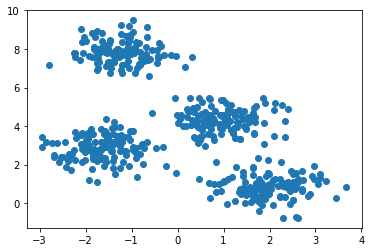

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.show()

***

## 2. 模型

使用sklearn机器学习库下的cluster模块的KMeans类来完成聚类算法的调用：

```python
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=0)
```
其中：
- **n_clusters：**KMeans聚类算法的K，也就是聚类的簇数
- **random_state：**保证每次运行结果一致

我们加载KMeans算法，并训练，训练完成后，模型会告诉我们聚成的4个类的中心，它的坐标是多少。
1. 加载KMeans算法，生成模型
2. 训练模型
3. 查看中心点的坐标
4. 查看聚类的结果

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)
model.fit(X)
centers_init = model.cluster_centers_

In [27]:
centers_init

array([[ 1.9896518 ,  0.85486599],
       [ 0.94866739,  4.33099426],
       [-1.23719873,  7.85161617],
       [-1.62397851,  2.84672953]])

In [28]:
model.labels_

array([0, 0, 1, 1, 0, 3, 3, 1, 1, 2, 3, 0, 3, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       3, 2, 1, 2, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 2, 1, 2, 0, 2, 1, 1, 0,
       3, 0, 1, 1, 0, 0, 2, 2, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 0, 0, 0, 3,
       1, 0, 1, 3, 2, 1, 2, 0, 2, 0, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 3, 0, 1, 2,
       2, 3, 2, 2, 0, 2, 0, 1, 3, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       3, 2, 2, 2, 1, 0, 1, 3, 0, 0, 0, 0, 3, 2, 1, 1, 3, 2, 2, 0, 1, 1,
       1, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 3, 0, 1, 2, 3, 0, 2, 0, 3, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2, 3, 3, 2, 1, 3,
       1, 2, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 0, 0, 1, 0, 3, 2, 2, 2,
       1, 0, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 0, 0, 3,
       3, 0, 2, 2, 1, 0, 1, 1, 1, 3, 0, 2, 1, 2, 2, 3, 2, 3, 1, 1, 0, 2,
       0, 0, 1, 1, 2, 0, 1, 2, 0, 3, 0, 2, 3, 3, 1, 0, 0, 1, 0, 3, 0, 3,
       3, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0,

## 3. 绘图

然后，绘图观察KMeans聚类算法是否达到了我们的预期

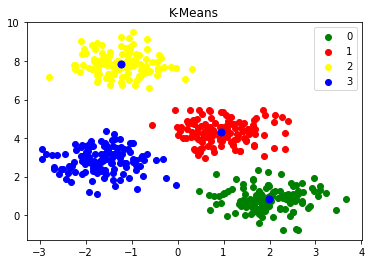

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = ['green', 'red', 'yellow', 'blue']

for k, col in enumerate(colors):
    ax.scatter(X[model.labels_==k, 0], X[model.labels_==k, 1], label=k,
                c=col)

ax.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
ax.legend()
ax.set_title("K-Means")
#plt.savefig("K-Means.png")
plt.show()

## 4. 对比
我们来对比一下，模型前后

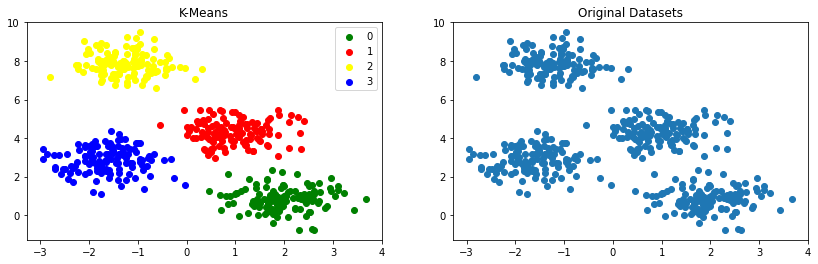

In [42]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# plot k-means
for k, col in enumerate(colors):
    ax1.scatter(X[model.labels_==k, 0], X[model.labels_==k, 1], label=k, 
                c=col)
ax1.set_title("K-Means")
ax1.legend()

# plot original datasets
plt.scatter(X[:,0],X[:,1])
ax2.set_title('Original Datasets')
plt.show()
